In [24]:
# Import the necessary libraries
from qiskit import QuantumCircuit, transpile, Aer, execute
import matplotlib.pyplot as plt
import random
import pandas as pd


In [21]:
def initialize_all_zeros(nr_qubits):
    # Create a quantum circuit with N qubits
    qc = QuantumCircuit(nr_qubits)
    
    # Initialize all qubits in the |0⟩ state
    for qubit in range(nr_qubits):
        qc.initialize([1, 0], qubit)
    
    return qc

def apply_cnot_chain(qc, control_qubit, nr_qubits):
    # Apply CNOT gates from the control qubit to the list of target qubits
    for target_qubit in range(nr_qubits-1):
        qc.cx(control_qubit, target_qubit+1)

def random_measurement_basis(nr_qubits):
    measurement_basis = ['x', 'y', 'z']
    return [random.choice(measurement_basis) for _ in range(nr_qubits)]

In [30]:
nr_qubits = 6
control_qubit = 0 #Usually just the first qubit

nr_repetitions = 1000 #amount of times the shadows are generated and measured with 1 shot each



In [31]:
# Create an empty DataFrame with columns for measurement basis and result
df = pd.DataFrame(columns=["Measurement Basis", "Measured Result"])

# Initialize a list to store the rows
rows = []

for _ in range(nr_repetitions):
    # Create a quantum circuit with N qubits
    qc = initialize_all_zeros(nr_qubits)

    # Apply a Hadamard gate to qubit 0
    qc.h(control_qubit)

    apply_cnot_chain(qc, control_qubit, nr_qubits)

    # Choose random measurement basis for each qubit
    measurement_bases = random_measurement_basis(nr_qubits)
    # print(measurement_bases)

    # Apply the measurement bases to the qubits
    for qubit in range(nr_qubits):
        # print('start', qubit)
        if measurement_bases[qubit] == 'x':
            qc.h(qubit)
            # print('qubit x', qubit)
        elif measurement_bases[qubit] == 'y':
            qc.sdg(qubit)
            qc.h(qubit)
            # print('qubit y', qubit)

    # Add measurements for all qubits in the Z basis
    qc.measure_all()

    # Simulate the circuit and get measurement results
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=1)
    result = job.result()
    counts = result.get_counts(qc)

    # Iterate through the qubits and add their measurement results to the list
    for qubit in range(nr_qubits):
        basis = measurement_bases[qubit]
        result = int(list(counts.keys())[0][nr_qubits - 1 - qubit])  # Extract the result
        rows.append(pd.DataFrame({"Measurement Basis": [basis], "Measured Result": [result]}))

    # Concatenate the rows into the DataFrame and reset the index
    df = pd.concat(rows, ignore_index=True)

# Display the DataFrame
print(df)






     Measurement Basis  Measured Result
0                    y                0
1                    z                1
2                    z                1
3                    z                1
4                    z                1
...                ...              ...
5995                 x                0
5996                 y                1
5997                 x                0
5998                 y                1
5999                 y                0

[6000 rows x 2 columns]


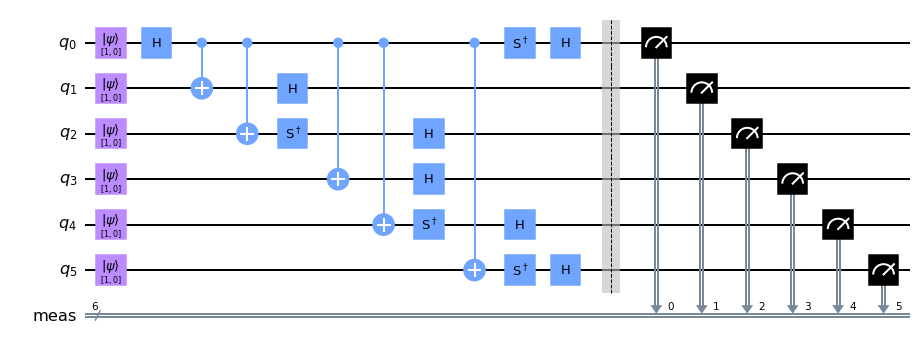

In [32]:
qc.draw(output='mpl')



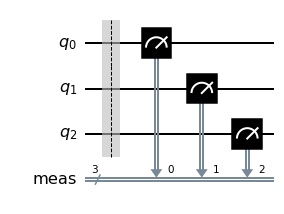